In [161]:
#import standard libaries
import pandas as pd
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [81]:
#load the dataset
weather = pd.read_csv("data/weather.csv",index_col='DATE')

In [74]:
#check for few of the rows
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#check the percentage of nulls
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.501529
ACSH       0.501478
AWND       0.265177
FMTM       0.475141
PGTM       0.364042
PRCP       0.000000
SNOW       0.000000
SNWD       0.000000
TAVG       0.680336
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501737
WDF2       0.498885
WDF5       0.503240
WDFG       0.734512
WDFM       0.999948
WESD       0.685261
WSF1       0.501581
WSF2       0.498885
WSF5       0.503292
WSFG       0.613096
WSFM       0.999948
WT01       0.630256
WT02       0.935041
WT03       0.933278
WT04       0.982581
WT05       0.981129
WT06       0.990616
WT07       0.994401
WT08       0.796983
WT09       0.992742
WT11       0.999274
WT13       0.886723
WT14       0.954015
WT15       0.997823
WT16       0.659028
WT17       0.996889
WT18       0.939499
WT19       0.999948
WT21       0.999741
WT22       0.997460
WV01       0.999948
dtype: float64

In [12]:
#remove the columns where null% is < 0.05
valid_columns = weather.columns[null_pct<.05]

valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [16]:
#change the weather data to only contains valid columns
weather = weather[valid_columns].copy()
weather.head()

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21


In [18]:
#lower case all the column names
weather.columns = weather.columns.str.lower()
print(weather.columns)

Index(['station', 'name', 'prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')


In [19]:
#fill all the null values
weather = weather.ffill()

In [21]:
#check the data types
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [22]:
#check the index
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17', '2022-10-18',
       '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23'],
      dtype='object', name='DATE', length=19289)

In [23]:
#convert the index to date_time object
weather.index = pd.to_datetime(weather.index)

In [25]:
#check how many times each year is repeating in the data
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    296
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

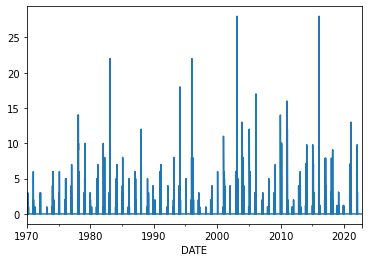

In [26]:
#EDA
weather['snwd'].plot()

In [28]:
#create a target
weather['target'] = weather.shift(-1)["tmax"]
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,65.0


In [29]:
#use ffill to populate the last NaN, one incorrect value woudn't make a huge difference
weather = weather.ffill()
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,65.0


In [30]:
#check for the collinearity
weather.corr()

#prcp column is uncorrelated to many attributes but to snow
#tmax and tmin are highly correlated

,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.150877,0.000931,-0.007169,0.052306,-0.003311
snow,0.150877,1.000000,0.233048,-0.175076,-0.159289,-0.172736
snwd,0.000931,0.233048,1.000000,-0.258784,-0.255869,-0.240075
tmax,-0.007169,-0.175076,-0.258784,1.000000,0.955484,0.915294
tmin,0.052306,-0.159289,-0.255869,0.955484,1.000000,0.915471
target,-0.003311,-0.172736,-0.240075,0.915294,0.915471,1.000000


In [32]:
#applying the machine learning model

#ridge regression helps penalize the collinearity
rr = Ridge(alpha=.1) #alpha parameter takes care of how much the coefficients are shurnk for maintaining collinearity

In [35]:
#create predictor columns
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [39]:
#create backtest function for time series data 
#reason for this being created is we cant use future data to predict historical data

def backtest(weather,model,predictors,start=3650,step=90): #starts from 1980
    all_predictions = [] #predictions for 90 days
    for i in range(start,weather.shape[0],step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors],train["target"])
        
        preds = model.predict(test[predictors])
        
        preds = pd.Series(preds, index=test.index)
        
        combined = pd.concat([test["target"],preds],axis=1)
        
        combined.columns = ["actual","prediction"]
        
        combined['diff'] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
        
    return pd.concat(all_predictions,axis=0)

In [42]:
predictions = backtest(weather,rr,predictors) 
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2022-10-19,61.0,57.030620,3.969380
2022-10-20,64.0,59.784159,4.215841
2022-10-21,65.0,60.608254,4.391746


In [44]:
#mean absolute error 
mean_absolute_error(predictions["actual"],predictions["prediction"])

#on average we were 5 degrees off from an actual temperature

5.138790329330702

In [46]:
#improve the model
def pct_diff(old,new):
    return (new - old)/old

def compute_rolling(weather,horizon,col): 
    #horizon is #days we wanna compute rolling averages for
    #column is column to compute rolling average on
    label = f"rolling_{horizon}_{col}"
    
    #if the horizon = 14, it would compute 14 day rolling mean for the column specified
    weather[label] = weather[col].rolling(horizon).mean()
    
    weather[f"{label}_percnt"] = pct_diff(weather[label],weather[col])
    
    return weather

In [49]:
rolling_horizons = [3,14]
rolling_columns = ["tmax","tmin","prcp"]
for horizon in rolling_horizons:
    for col in rolling_columns:
        weather = compute_rolling(weather,horizon,col)        
        
        
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_percnt,rolling_3_tmin,rolling_3_tmin_percnt,rolling_3_prcp,rolling_3_prcp_percnt,rolling_14_tmax,rolling_14_tmax_percnt,rolling_14_tmin,rolling_14_tmin_percnt,rolling_14_prcp,rolling_14_prcp_percnt
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0,32.333333,0.175258,23.000000,0.086957,6.666667e-03,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0,33.333333,-0.070000,23.333333,-0.014286,6.666667e-03,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,34.666667,0.009615,23.000000,-0.086957,6.666667e-03,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,48.333333,-0.110345,2.666667e-02,-1.0,67.000000,-0.164179,50.000000,-0.140000,0.095714,-1.000000
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0,58.333333,0.045714,45.000000,-0.022222,3.700743e-16,-1.0,65.928571,-0.074756,49.428571,-0.109827,0.095714,-1.000000
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,65.0,60.333333,0.060773,43.333333,-0.007692,3.700743e-16,-1.0,65.071429,-0.016465,48.500000,-0.113402,0.095714,-1.000000


In [52]:
#select next 14 rows to exclude null values
weather = weather.iloc[14:]
weather.head(5)

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_percnt,rolling_3_tmin,rolling_3_tmin_percnt,rolling_3_prcp,rolling_3_prcp_percnt,rolling_14_tmax,rolling_14_tmax_percnt,rolling_14_tmin,rolling_14_tmin_percnt,rolling_14_prcp,rolling_14_prcp_percnt
DATE,,,,,,,,,,,,,,,,,,,,
1970-02-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,37,30,32.0,42.666667,-0.132812,34.333333,-0.126214,0.503333,-1.000000,41.214286,-0.102253,28.142857,0.065990,0.205714,-1.000000
1970-02-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32,22,24.0,38.000000,-0.157895,29.333333,-0.250000,0.000000,NaN,40.142857,-0.202847,28.000000,-0.214286,0.205714,-1.000000
1970-02-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.11,1.6,0.0,24,17,35.0,31.000000,-0.225806,23.000000,-0.260870,0.036667,2.000000,39.285714,-0.389091,27.642857,-0.385013,0.213571,-0.484950
1970-02-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.34,2.7,3.0,35,24,35.0,30.333333,0.153846,21.000000,0.142857,0.150000,1.266667,38.357143,-0.087523,26.928571,-0.108753,0.237857,0.429429
1970-02-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,35,29,39.0,31.333333,0.117021,23.333333,0.242857,0.150000,-1.000000,37.357143,-0.063098,26.428571,0.097297,0.230000,-1.000000


In [53]:
#last few rows have NaN values hence fill it with 0
weather = weather.fillna(0)

In [54]:
#adding few more predictors
def expand_mean(df):
    return df.expanding(1).mean()

In [55]:
for col in ["tmax","tmin","prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month,group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year,group_keys=False).apply(expand_mean)

In [58]:
#weather.head(2)

In [59]:
#create a new predictor variable
predictors1 = weather.columns[~weather.columns.isin(["target","name","station"])]
predictors1

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_percnt', 'rolling_3_tmin', 'rolling_3_tmin_percnt',
       'rolling_3_prcp', 'rolling_3_prcp_percnt', 'rolling_14_tmax',
       'rolling_14_tmax_percnt', 'rolling_14_tmin', 'rolling_14_tmin_percnt',
       'rolling_14_prcp', 'rolling_14_prcp_percnt', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

In [63]:
#create a model and fit it to training data
predictions1 = backtest(weather,rr,predictors1) 
predictions1.head()

,actual,prediction,diff
DATE,,,
1980-02-10,37.0,35.387092,1.612908
1980-02-11,37.0,35.099660,1.900340
1980-02-12,38.0,38.471824,0.471824
1980-02-13,44.0,38.964292,5.035708
1980-02-14,36.0,39.599450,3.599450


In [64]:
#mean absolute error 
mean_absolute_error(predictions1["actual"],predictions1["prediction"])

4.790885996343952

In [65]:
#check the errors
predictions1.sort_values("diff",ascending=False)

# we can see the anamoly in temps where one day had lot more temp and next day had lot less temp

,actual,prediction,diff
DATE,,,
1990-03-12,85.0,54.337566,30.662434
2007-03-26,78.0,49.986581,28.013419
1998-03-26,80.0,51.991322,28.008678
2003-04-15,86.0,59.391831,26.608169
1985-04-18,84.0,58.434999,25.565001
...,...,...,...
1986-08-05,82.0,81.998284,0.001716
1984-04-04,54.0,54.000937,0.000937
2010-08-03,85.0,85.000786,0.000786


In [67]:
#check for the anomolous data from march 7th to march 17th
weather.loc['1990-03-07':'1990-03-17']

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_percnt,...,rolling_14_tmin,rolling_14_tmin_percnt,rolling_14_prcp,rolling_14_prcp_percnt,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32,14,39.0,33.666667,-0.049505,...,25.000000,-0.440000,0.047857,-1.000000,48.590112,45.428571,34.567783,31.857143,0.119410,0.111429
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39,20,43.0,35.000000,0.114286,...,24.071429,-0.169139,0.040714,-1.000000,48.574841,46.571429,34.544586,31.190476,0.119220,0.076667
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43,29,47.0,38.000000,0.131579,...,22.785714,0.272727,0.031429,-0.681818,48.565978,45.619048,34.535771,30.952381,0.119046,0.036190
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47,39,59.0,43.000000,0.093023,...,23.428571,0.664634,0.020714,-0.517241,48.563492,43.809524,34.542857,31.761905,0.118873,0.071905
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59,41,59.0,49.666667,0.187919,...,25.500000,0.607843,0.021429,1.333333,48.580032,46.142857,34.553090,31.904762,0.118764,0.126667
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,85.0,55.000000,0.072727,...,27.928571,0.539642,0.021429,-1.000000,48.596519,48.142857,34.566456,34.285714,0.118576,0.167619
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,67.666667,0.256158,...,29.500000,0.389831,0.020000,-1.000000,48.654028,48.761905,34.576619,34.285714,0.118389,0.091429
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,68.666667,-0.097087,...,30.857143,0.490741,0.020000,-1.000000,48.675079,50.190476,34.594637,36.809524,0.118202,0.259524
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,67.333333,-0.183168,...,32.214286,0.334812,0.020000,-1.000000,48.685039,49.714286,34.607874,35.761905,0.118016,0.066667


<AxesSubplot:>

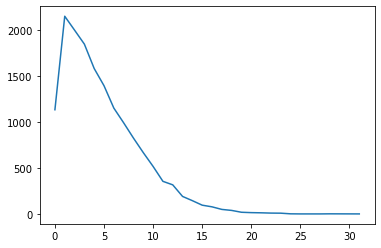

In [70]:
#check where the errors are occuring 
(predictions1['diff'].round()).value_counts().sort_index().plot()